![CC-BY-SA](https://mirrors.creativecommons.org/presskit/buttons/88x31/svg/by-sa.svg)


This notebook was created by [Bernardo Freitas Paulo da Costa](http://www.im.ufrj.br/bernardofpc),
and is licensed under Creative Commons BY-SA.

Antes de enviar este Teste, verifique que tudo está funcionando como esperado.
Por exemplo, **rode o código inteiro, do zero**.
Para isso, vá no menu, escolha _Kernel_, depois _Restart & Run All_.

Verifique, também, que você respondeu todas as questões:
* as questões de código têm `YOUR CODE HERE` (e você pode apagar o `raise NotImplemented` ao incluir sua resposta)
* as questões discursivas têm "YOUR ANSWER HERE".

---

# Funções inversas e algoritmos de cálculo de raízes

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parte 0: Inversa em um intervalo

Se a função $f: [a,b] \to R$ é injetiva em $[a,b]$,
ela possui uma inversa $g$, definida da imagem de $f$ e com valores no intervalo $[a,b]$.

Explique porque $f$ ser contínua e monótona garante que $f(x) = y$
sempre terá uma única raiz para $y$ entre $f(a)$ e $f(b)$.

Conclua que a bisseção sempre funciona neste caso.

Por ser monótona, a função ou sempre cresce ou sempre decresce, então para cada $y$ só há no máximo um $x$ associado, visto que no resto do intervalo, estará sempre acima ou abaixo desse ponto. No entanto, somente isso não garante que ela passe por esse ou qualquer ponto, isto é, pode haver um y em que $f(x)$ não está definida, uma descontinuidade. A bisseção não funcionaria nesse caso. Por isso, precisa ser também contínua. Dessa forma, a função passa - com certeza - em todos os pontos e uma única vez. Logo, existe uma única raíz para $f(x) = y$ para algum $y$ entre $f(a)$ e $f(b)$. 

Se, além disso, $f$ for derivável, isso garante que o método de Newton vai encontrar uma raiz para $f(x) = y$?

Dependendo da função, podem haver pontos que fazem o método entrar em loop e não conseguir divergir, pois fica alternando entre este ponto e algum outro, isso pode acontecer mesmo que a função seja contínua, monótona e derivável. Além disso, se a derivada em um ponto de uma função for zero, o método também não converge, pois o x seguinte seria o infinito.

# Parte 1: Usando a bisseção

## Questão 1: Implementação

Escreva uma função `biss_solve(f, y, a, b)` que encontra a solução de $f(x) = y$ no intervalo $[a,b]$,
supondo que $f$ é contínua e monótona neste intervalo.
Não esqueça de testar que, de fato, tem uma solução!

In [2]:
def biss_solve(f, y, a, b, xtol=1e-8, ytol=1e-8):
    """Bissects the interval  [a,b]  until an approximate solution to  f(x) = y  is found.
    Also returns the number of bissections"""
    eq = lambda x: f(x) - y
    m = (a+b)/2
    nbiss = 1
    if eq(a)==0:
        return a, nbiss
    elif eq(b) == 0:
        return b, nbiss
    while abs(b-a)>xtol and abs(eq(m))>ytol:
        eqm = eq(m)
        if eqm*eq(a) < 0:
            b = m
            m = (a+b)/2 
        elif eqm*eq(b) < 0:
            a = m
            m = (a+b)/2 
        elif eqm==0:
            return m, nbiss
        else:
            return "Sem solução", nbiss
        nbiss+=1
    return m, nbiss

### Testes da bisseção

In [3]:
z1, n1 = biss_solve(np.sin, 0.5, 0, np.pi/2)
z2, n2 = biss_solve(np.sin, 0.5, -np.pi/2, np.pi/2)
assert np.sin(z1) <= 1e-8 or abs(np.arcsin(0.5) - z1) < 1e-8
assert np.sin(z2) <= 1e-8 or abs(np.arcsin(0.5) - z2) < 1e-8

In [4]:
z1, n1 = biss_solve(np.sin, 0.5, 0, np.pi/2)
z2, n2 = biss_solve(np.sin, 0.5, -np.pi/2, np.pi/2)
assert 20 <= n1 <= 30
assert 20 <= n2 <= 30

In [5]:
z1, n1 = biss_solve(np.sin, 0.5, 0, np.pi/2)
z2, n2 = biss_solve(np.sin, 0.5, -np.pi/2, np.pi/2)
assert z1 == z2
assert n1 + 1 == n2

Explique os testes da caixa acima.

Duas bisseções foram chamadas para resolver a mesma equação, $sin(x) = 0.5$, mas com intervalos diferentes. O primeiro assert verifica se as duas retornaram a mesma raiz, o que é esperado, por serem a mesma equação. O segundo assert verifica se o número de iterações n2 é 1 a mais do que n1, isso ocorre porque o intervalo da segunda chamada é o dobro do intervalo da primeira. A primeira chamada já começa com $[0, \pi/2]$, já a segunda, com $[\pi/2,-\pi/2]$, só após a primeira iteração que a segunda chamada chega ao intervalo que começa a primeira.

### E mais testes...

In [6]:
z1, n1 = biss_solve(np.sin, 0.5, np.pi/2, 3*np.pi/2)
assert np.sin(z1) <= 1e-8 or abs(np.pi - np.arcsin(0.5) - z1) < 1e-8
assert 20 <= n1 <= 30

In [7]:
z1, n1 = biss_solve(np.sin, 0.5, 5*np.pi/2, 3*np.pi/2)
assert np.sin(z1) <= 1e-8 or abs(2*np.pi + np.arcsin(0.5) - z1) < 1e-8
assert 20 <= n1 <= 30

Comente os testes das duas caixas acima.

As duas caixas tem dois teste iguais: um para o erro em y da bisseção e outro para o número de iterações. O teste do erro é feito de duas formas, uma calculando a função na raíz retornada e outra calculando a inversa e subtraindo da raiz retornada. Apesar disso, os intervalos da bisseções são diferentes em cada caixa, na primeira o intervalo compreende o lado negativo do eixo x, na segunda, o positivo. Por este motivo e pela função sen(x) ter duas diferentes raízes para sen(x)=0.5, uma dentro do primeiro intervalo e outra no segundo, a segunda forma usada para testar o erro do y é diferente em cada caixa, pois z1 é diferente.

## Questão 2: Gráficos

Varie $y$ no intervalo $[0.05, 0.95]$ e faça o gráfico do número de iterações,
em função de y, para encontrar uma raiz de $\sin(x) = y$ no intervalo $[-\pi/2, \pi/2]$.

Use as tolerâncias padrão.

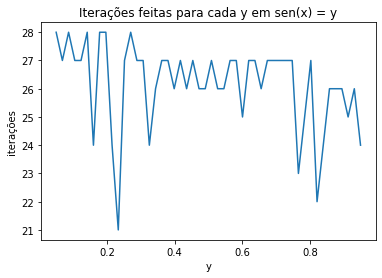

In [8]:
ys = np.linspace(0.05,0.95, num=50)
iters = [biss_solve(np.sin, y, -np.pi/2, np.pi/2)[1] for y in ys]
plt.plot(ys, iters)
plt.title("Iterações feitas para cada y em sen(x) = y")
plt.xlabel("y")
plt.ylabel("iterações")
ax = plt.gca()

In [9]:
assert len(ax.lines) == 1
assert ax.title.get_text() != ""
assert ax.get_xlabel() != ""
assert ax.get_ylabel() != ""

Faça, agora, o gráfico do erro em $x$ (usando `np.arcsin`) e em $y$.

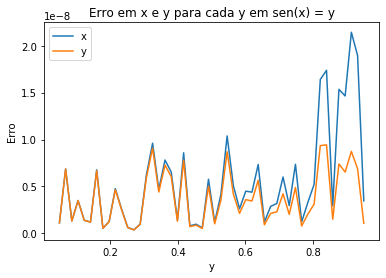

In [10]:
## Em dúvida se ta certo ##

ys = np.linspace(0.05,0.95, num=50)
xs = [biss_solve(np.sin, y, -np.pi/2, np.pi/2)[0] for y in ys]

erro_x = [abs(xs[i] - np.arcsin(ys[i])) for i in range(50)]
erro_y = [abs(np.sin(xs[i]) - ys[i]) for i in range(50)]

plt.plot(ys, erro_x, label="x")
plt.plot(ys,erro_y, label="y")
plt.title("Erro em x e y para cada y em sen(x) = y")
plt.xlabel("y")
plt.ylabel("Erro")
plt.legend()
ax = plt.gca()

In [11]:
assert len(ax.lines) == 2
assert len(ax.legend().texts) == 2

In [12]:
assert ax.title.get_text() != ""
assert ax.get_xlabel() != ""
assert ax.get_ylabel() != ""

O que você percebe neste gráfico?

Os erros começam com valores iguais, oscilando em um intervalo em comum, com o aumento de y, o intervalo de valores do erro em x aumenta, enquanto que o erro em y permanece em geral no mesmo.

Faça um gráfico do quociente entre os erros.

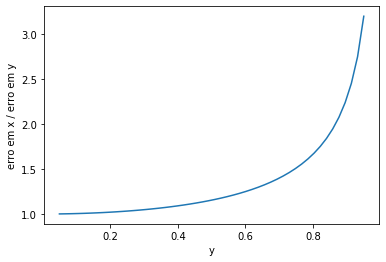

In [13]:
plt.plot(ys, [erro_x[i]/erro_y[i] for i in range(50)])
plt.xlabel("y")
plt.ylabel("erro em x / erro em y");

Como este gráfico ajuda a explicar o anterior?

Considerando o gráfico apenas do quociente entre os erros, podemos melhor ver o evolução da diferença entre os erros do gráfico anterior.

# Parte 2: Newton

## Questão 3: Implementação

Escreva uma função `newton_solve(f, df, y, x0)` que encontra uma solução de $f(x) = y$,
a partir de $x_0$.

In [14]:
def newton_solve(f, df, y, x0, xtol=1e-8, ytol=1e-8, maxiter=100):
    """Newton's algorithm for solving  f(x) = y  starting from  x0.
    Also returns the number of evaluations of f"""
    nevals = 0
    x = x0
    def g(x): return f(x) - y
    
    for i in range(0,maxiter):
        g1 = g(x)
        step = g1 / df(x)
        nevals += 1
        newx = x - step
        if abs(step) < xtol or abs(g1) < ytol:
            return newx,nevals
        x = newx
    return newx,nevals

### Testes do algoritmo de Newton

In [15]:
z1, n1 = newton_solve(np.sin, np.cos, 0.5, 0)
z2, n2 = newton_solve(np.sin, np.cos, 0.5, 0.5)
assert np.sin(z1) <= 1e-8 or abs(np.arcsin(0.5) - z1) < 1e-8
assert np.sin(z2) <= 1e-8 or abs(np.arcsin(0.5) - z2) < 1e-8

In [16]:
z1, n1 = newton_solve(np.sin, np.cos, 0.5, 0)
z2, n2 = newton_solve(np.sin, np.cos, 0.5, 0.5)
assert 3 <= n1 <= 6
assert 3 <= n2 <= 6

In [17]:
z1, n1 = newton_solve(np.sin, np.cos, 0.5, 0)
z2, n2 = newton_solve(np.sin, np.cos, 0.5, 0.5)
assert z1 == z2
assert n1 == n2 + 1

Explique os testes da caixa acima, e compare com o teste equivalente para a bisseção.

Os testes acima realizam a mesma verificação daqueles na parte da bisseção: novamente as raízes devem ser iguais, pela equação ser a mesma, exceto pelos intervos passados. A diferença nos intervalos causa o mesmo efeito sobre o número de iterações que aquele observado e explicado no teste equivalente para a bisseção.

### E mais testes...

In [18]:
z0, n0 = newton_solve(np.sin, np.cos, 0.5, 0)

for n in range(1,100):
    z1, n1 = newton_solve(np.sin, np.cos, 0.5, 2*n*np.pi)
    assert np.sin(z1) <= 1e-8 or abs(2*n*np.pi + np.arcsin(0.5) - z1) < 1e-8, n
    assert 2 <= n1 <= 6, n
    assert n1 == n0, n
    assert np.isclose(z1, z0 + (2*n*np.pi), atol=1e-15, rtol=1e-15), n

Comente a caixa anterior.

Na caixa anterior, estão sendo feitas verificações: 
Se o valor encontrado está dentro da tolerância pretendida;
Se são necessárias poucas iterações para convergir;
Se o número de iterações é correspondente para ângulos replementares, isto é, cujo valor da função têm o mesmo resultado (0, 2pi, 4 pi, etc);
Se o resultado obtido na iteração atual é igual ao anterior, já que o ângulo é replementar (portanto, o resultado terá que ser o mesmo).

## Questão 4: Gráficos

Varie $y$ no intervalo $[0.05, 0.95]$ e faça o gráfico do número de iterações,
em função de y, para encontrar uma raiz de $\sin(x) = y$ no intervalo $[-\pi/2, \pi/2]$.

Use as tolerâncias padrão.

6.123233995736766e-17


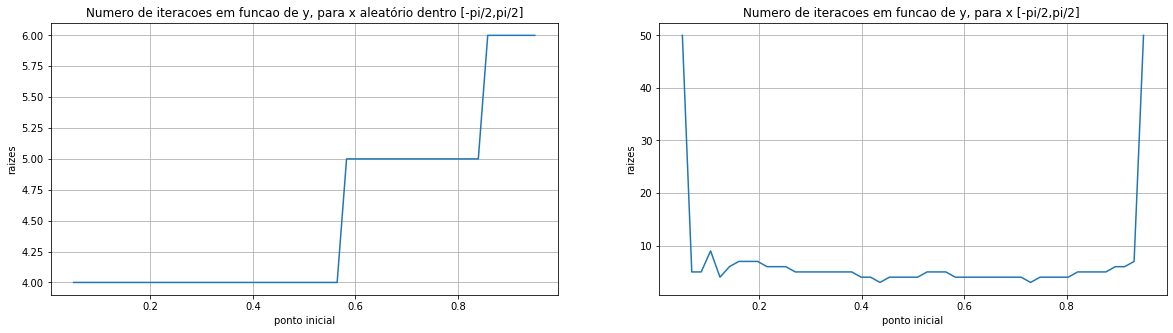

In [19]:
ys = np.linspace(0.05,0.95, num=50)
xs1 = np.linspace(-np.pi/2,np.pi/2, num=50)
from random import uniform

xs = uniform(-np.pi/2,np.pi/2)
z1 = [newton_solve(np.sin,np.cos,y,x0,xtol=1e-8,ytol=1e-8,maxiter=50) for (x0,y) in zip(xs1,ys)]
z  = [newton_solve(np.sin,np.cos,y, xs,xtol=1e-8,ytol=1e-8,maxiter=5000) for y in ys]
yc = []
nc = []
nc1 = []
for i in range(len(z)):
    yc.append(z[i][0])
    nc.append(z[i][1])
    nc1.append(z1[i][1])

'''plt.plot(ys,nc)
plt.xlabel("VALORES DE Y")
plt.ylabel("N ITERACOES")
plt.title("Numero de iteracoes em funcao de y, para x [-pi/2,pi/2]")
'''
fig = plt.figure(figsize=(20,5))
ax = fig.add_subplot(1,2,1)
ax.plot(ys,nc)
ax.set(xlabel="ponto inicial", ylabel="raizes")
ax.set_title("Numero de iteracoes em funcao de y, para x aleatório dentro [-pi/2,pi/2]")
ax.grid()



ax2 = fig.add_subplot(1,2,2)
ax2.plot(ys,nc1)
ax2.set(xlabel="ponto inicial", ylabel="raizes")
ax2.set_title("Numero de iteracoes em funcao de y, para x [-pi/2,pi/2] ")
ax2.grid()

print(np.cos(-np.pi/2))
ax = plt.gca()

In [20]:
assert len(ax.lines) == 1
assert ax.title.get_text() != ""
assert ax.get_xlabel() != ""
assert ax.get_ylabel() != ""

Comente as diferenças entre este gráfico e o correpondente para a bisseção.

Primeiramente nota-se o numero de iterações entre os dois métodos; bisseção possui consideravel número médio de iterações, enquanto newton mantém menos da métade do método anterior.
Entretanto como o método da bisseção requer um intervalo para achar as raízes, o numero de iterações vai variar apenas pelo $y$, enquanto newton, que requer apenas um chute inicial, varia suas iterações por causa de $x$ e $y$.

Percebemos também que para os valores extremos do intervalo o número de iterações excede ao permitido. Isso devido a derivada sendo $cos(x)$. Como o computador nao retorna extamente $0$ para a derivada, não há divisão por zero que pare o loop, e por retornar um valor muito pequeno, a variação de $xi$ com o step é imperceptível, o que mantém sempre o mesmo valor de x e não encontramos a raiz.

Como você explica estas diferenças?

No texto acima.

Faça, agora, o gráfico do erro em $x$ (usando `np.arcsin`) e em $y$.

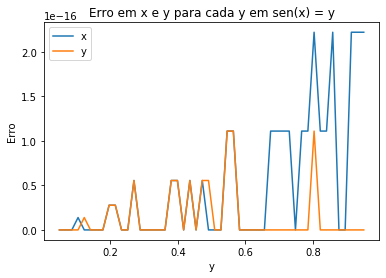

In [21]:
ys = np.linspace(0.05,0.95, num=50)
xs = np.linspace(-0.1,0.1, num=50)

def f2(x): return np.sin(x) #np.arcsin(x) 
def df2(x): return np.cos(x) #1/((1-(x**2))**(1/2))

xs = [newton_solve(f2,df2,y,x,xtol=1e-8,ytol=1e-8,maxiter=100)[0] for (x,y) in zip(xs,ys)]
erro_x = [abs(xs[i] - np.arcsin(ys[i])) for i in range(50)]
erro_y = [abs(np.sin(xs[i]) - ys[i]) for i in range(50)]

plt.plot(ys, erro_x, label="x")
plt.plot(ys,erro_y, label="y")
plt.title("Erro em x e y para cada y em sen(x) = y")
plt.xlabel("y")
plt.ylabel("Erro")
plt.legend()

ax = plt.gca()

In [22]:
assert len(ax.lines) == 2
assert len(ax.legend().texts) == 2

assert ax.title.get_text() != ""
assert ax.get_xlabel() != ""
assert ax.get_ylabel() != ""

O que você percebe neste gráfico?
Em que sentido ele é similar ao correspondente à bisseção, e em que sentido ele é diferente?

Segue o mesmo comportamento do estudo da bisseção, com o aumento de y, o erro em x aumenta. A ordem de grandeza do Newton é muito menor que da Bisseção.

# Parte 3: Aproximações sucessivas

O método de Newton funciona bem quando o valor de $x_0$, candidato a raiz de $f(x) = y$,
está próximo da raiz real $x = f^{-1}(y)$.

Nesta parte, vamos investigar um pouco a ideia de "começar em um ponto conhecido e seguir daí em diante".

## Questão 5: Newton por partes

Implemente a função `newton_inv(f, df, ys, x0)`, que calcula todas as soluções de $f(x) = y$,
para cada $y$ no vetor `ys`, que supomos ordenado.
Use $x_0$ para iniciar o método, e depois use a raiz anterior para continuar.

In [23]:
def newton_inv(f, df, ys, x0, xtol=1e-8, ytol=1e-8, maxiter=100):
    """Newton's algorithm for solving  f(x) = y  for each  y  in the list  ys.
    Returns two lists, one of the (approximate) roots, another of the iterations for each one."""
    xs     = []
    nevals = []
    
    for i in range(len(ys)):
        x, n = newton_solve(f, df, ys[i], x0, xtol=xtol, ytol=ytol)
        nevals.append(n)
        xs.append(x)
        x0 = x
    return xs,nevals

In [24]:
ys = np.linspace(0,0.5,num=6)
xs, ns = newton_inv(np.sin, np.cos, ys, 0, xtol=1e-12, ytol=1e-12)
assert len(xs) == len(ys)
assert len(ns) == len(ys)

In [25]:
ys = np.linspace(0,0.5,num=6)
xs, ns = newton_inv(np.sin, np.cos, ys, 0, xtol=1e-12, ytol=1e-12)
assert np.allclose(np.sin(xs), ys, atol=1e-12, rtol=1e-12)

In [26]:
ys = np.linspace(0,0.5,num=6)
xs, ns = newton_inv(np.sin, np.cos, ys, 0, xtol=1e-12, ytol=1e-12)
assert ns[0] == 1
assert np.all(3 <= np.array(ns[1:]))
assert np.all(np.array(ns[1:]) <= 6)

In [27]:
ys = np.linspace(0,0.5,num=11)
xs, ns = newton_inv(np.sin, np.cos, ys, 0, xtol=1e-15, ytol=1e-15)
assert np.allclose(np.sin(xs), ys, atol=1e-15, rtol=1e-15)

## Questão 6: Gráficos

Faça um gráfico do número de iterações necessárias para calcular a inversa do seno,
em cada ponto do intervalo $[0, 0.9]$, com precisão de $10^{-15}$,
para os três métodos:
- bisseção
- Newton
- Newton por partes

In [28]:
f2 = lambda x: np.sin(x)
df2 = lambda x: np.cos(x)

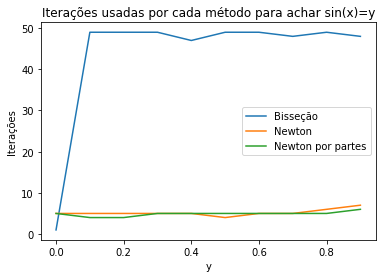

In [29]:
ys = np.linspace(0,0.9, num=10)

na = [biss_solve(f2, y, 0, 1.2, xtol=1e-15, ytol=1e-15)[1] for y in ys];
nb = [newton_solve(f2, df2, y, 0.5, xtol=1e-15, ytol=1e-15, maxiter=100)[1] for y in ys];
_ , nc = newton_inv(f2, df2, ys, 0.5, xtol=1e-15, ytol=1e-15, maxiter=100)
plt.plot(ys, na, label = 'Bisseção')
plt.plot(ys,nb, label = 'Newton')
plt.plot(ys,nc, label = 'Newton por partes')
plt.xlabel("y")
plt.ylabel("Iterações")
plt.title("Iterações usadas por cada método para achar sin(x)=y")
plt.legend()

ax = plt.gca();

In [30]:
assert len(ax.lines) == 3
assert len(ax.legend().texts) == 3

assert ax.title.get_text() != ""
assert ax.get_xlabel() != ""
assert ax.get_ylabel() != ""

O que você observa?

O método da bisseção necessita de um número maior de iterações para convergir, quando comparado com os métodos de Newton. O de Newton precisa geralmente de mais iterações que o de Newton por partes, pois o primeiro mantém o mesmo valor inicial e o segundo varia. 

## Questão 7: Logaritmos e Exponenciais

In [31]:
def mulinv(x):
    return 1/x

In [32]:
x, n = newton_solve(np.log, mulinv, -0.1, 1)
assert np.isclose(np.log(x), -0.1)

In [33]:
for y in [0.9, 0.99, 0.999, 0.9999, 0.99999]:
    print(y, newton_solve(np.log, mulinv, -y, 1))

0.9 (0.4065696597405991, 7)
0.99 (0.37157669102204566, 9)
0.999 (0.36824750461366296, 10)
0.9999 (0.367916230955018, 11)
0.99999 (0.36788311998424805, 12)


In [34]:
newton_solve(np.log, mulinv, -1.0, 1)

/Users/stephanie.medeiros/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  
/Users/stephanie.medeiros/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in double_scalars
  
/Users/stephanie.medeiros/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


(nan, 100)

Explique o que aconteceu nas duas caixas acima.

Na última caixa, ocorre um erro de divisão por zero. Isso acontece, pois:

f(x) = log(x) + 1
df(x) = 1/x
passo = (log(x) + 1)/(1/x)

Se x = 1: f(1) = 1, df(1) = 1/1 = 1
f(1) / df(1) = 1
novox = 1 - f(1)/df(1) = 1 - 1 = 0

Se x = 0: df(0) = 1/0 = erro!

Os valores para função em ambas as caixas são bastante próximos (0.9999 é aproximadamente igual a 1), mas, na anterior, por não ter sido usado exatamente 1 (e sim um valor próximo e bastante preciso), fez com que fosse possível atingir a convergência. Pois não se iria obter zero para o novo valor de x:

f(0.99999) = log(0.99999) + 1 = 0.99999

df(0.99999) = 1/0.99999 = 1.00001

passo = f(0.99999)/df(0.99999) = 0.99999/1.00001 = 0.9998

novox = 0.99999 - 0.9998 = 9.9999e-6 (diferente de zero! Logo, o cálculo continua.)

In [35]:
print(newton_solve(np.log, mulinv, -1.99999, 1/np.e))
print(newton_solve(np.log, mulinv, -2.0, 1/np.e))

(0.13533663659621187, 12)
(nan, 100)


/Users/stephanie.medeiros/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  
/Users/stephanie.medeiros/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in double_scalars
  
/Users/stephanie.medeiros/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


Explique porque esta caixa é semelhante às anteriores,
e o que isso sugere quanto à dificuldade de resolver, usando o método de Newton,
a equação $\log(x) = y$ para $y$ negativo.

Também ocorre um erro de divisão por zero. Isso acontece, pois:

Situação 1
f(x) = log(x) + 1.99999
df(x) = 1/x
passo = f(x)/df(x)

Se x = 1/e = e^-1: f(e^-1) = 0.99999, df(e^-1) = 1/(e^-1) = e
f(e^-1) / df(e^-1) = 0.36785762
novox = 1/e - 0.36785762 = 3.6787944e-6

Se x = 3.6787944e-6: f(3.6787944e-6) = -1,25129255, df(3.6787944e-6) = 2.71828183e5
f(3.6787944e-6) / df(3.6787944e-6) = -4.60324804e-6
novox = 3.6787944e-6 + 4.60324804e-6 = 8.28204244e6

(...) até convergir

Situação 2
f(x) = log(x) + 2
df(x) = 1/x
passo = f(x)/df(x)

Se x = 1/e = e^-1: f(e^-1) = 1, df(e^-1) = 1/(e^-1) = e
f(e^-1) / df(e^-1) = 1/e
novox = 1/e - 1/e = 0 

Se x = 0: df(0) = 1/0 = erro!

Mesmo problema do anterior, será preciso utilizar um valor muito próximo (preciso), mas diferente de 2. Ou seja, deve-se usar valores precisos, mas não exatos em casos de valores negativos para y. 

In [36]:
ys = np.linspace(0,20,num=30)
xs, ns = newton_inv(np.log, mulinv, -ys, 1, xtol=1e-15, ytol=1e-15)
assert np.allclose(np.log(xs), -ys)

Explique porque o método de aproximações funciona.

No método de Newton por partes, o valor da variável é alterado a cada iteração (assumindo o valor obtido anteriormente), então, não ocorre o erro de divisão por zero, como é o caso do método de Newton, que parte de um valor fixo.

Qual seria a dificuldade para adaptar o método de "aproximação sucessiva" para a Bisseção?

A aproximação sucessiva do método de newton utiliza a última raiz como valor inicial para encontrar a próxima raíz para um outro valor de $y$. Na bisseção, podemos encontrar a raíz para vários valores de $y$, mas não há o argumento de valor inicial, $x0$. Em vez disso, há um intervalo a ser determinado. Poderíamos atualizar $a$ ou $b$ do intervalo passado, conforme encontramos novas raízes, mas qual dos dois atualizar com o valor da raíz encontrada vai depender de como variamos o $y$ a ser encontrado. Considerando a questão 6, com $f(x) = sen(x)$, e $y$ indo de $0$ a $0.9$, podemos diminuir o valor do extremo final do intervalo - ou seja, $b$ - passado para a bisseção, para ser o valor da última raíz encontrada, já que o próximo $y$, que é maior, vai estar em um $x$ anterior à raíz encontrada para tal $y$ considerado anteriormente, já que a função é decrescente em $x \in [0,\pi/2]$, ou seja, valores maiores de y, estão em menos valores x. Se a função fosse crescente, para cada $y$ maior, o $x$ também seria maior, então teríamos que atualizar o extremo inferior, $a$, com a raíz encontrada anteriormente. Isto tudo quer dizer que precisamos saber se a função cresce ou decresce a cada novo y a ser calculado.

## Questão 8: Uma função parecida

Resolva a equação $\log(x) + 10^9 x = -20$.

In [37]:
def f(x):
    return np.log(x) + 1e9*x
def df(x):
    return 1/x + 1e9

In [38]:
x = (newton_solve(f,df,-20,0.0000000002, xtol=1e-15, ytol=1e-15, maxiter=100))[0]

In [39]:
assert np.isclose(f(x), -20, atol=1e-13, rtol=1e-13)

/Users/stephanie.medeiros/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


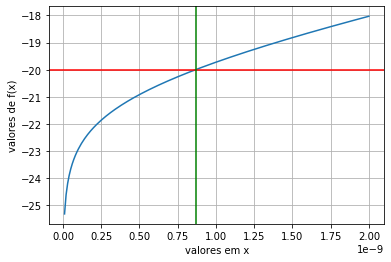

In [40]:
x = np.linspace(0,0.000000002, num=200)
x1 = (newton_solve(f,df,-20,0.0000000002, xtol=1e-15, ytol=1e-15, maxiter=100))[0]
y = f(x)
plt.plot(x,y)
plt.grid()
plt.xlabel("valores em x")
plt.ylabel("valores de f(x)")
plt.axhline(-20,color="red")
plt.axvline(x1,color="green")


Dizemos que f(x) é a função do lado esquerdo da equação e que o lado direito é g(x). Queremos o ponto $x$ onde $f(x) = g(x)$, ou seja, $f(x)$ tem que corresponder a reta -20. Observamos qual o intervalo onde $f(x)$ entra nessa região e estimamos o melhor ponto inicial, visto que, para um chute muito longe desse intervalo, o método não converge. 
Por isso, estimamos um ponto inicial em todo de 2e-9.